In [84]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [126]:
from google.colab import drive
drive.mount('/content/drive')
dados = pd.read_csv('/content/drive/MyDrive/colab/credit_risk.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
dados.columns

Index(['default', 'conta_corrente', 'prazo_emprestimo_meses',
       'historico_credito', 'proposito_emprestimo', 'valor_emprestimo',
       'reserva_cc', 'tempo_emprego_atual', 'taxa_comp_salario',
       'sexo_est_civil', 'outros_fiadores', 'anos_residencia_atual',
       'propriedade', 'idade', 'outros_planos_financiamento',
       'tipo_residencia', 'n_creditos_banco', 'status_emprego',
       'n_dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

In [27]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [28]:
dados['conta_corrente'].value_counts()

no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: conta_corrente, dtype: int64

In [29]:
# Risco 4: não possui conta
# Risco 3: possui conta recente
# Risco 2: possui conta a algum tempo
# Risco 1: possui conta a bastante tempo

a = {
    'no checking account': 4,
    '< 0 DM': 3,
    '0 <= ... < 200 DM': 2,
    '>= 200 DM / salary assignments for at least 1 year': 1  
}

dados['conta_corrente'] = dados['conta_corrente'].map(a)

In [ ]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,3,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,3,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,3,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
dados['historico_credito'].value_counts()

existing credits paid back duly till now                       530
critical account/ other credits existing (not at this bank)    293
delay in paying off in the past                                 88
all credits at this bank paid back duly                         49
no credits taken/ all credits paid back duly                    40
Name: historico_credito, dtype: int64

In [ ]:
a = {
    'existing credits paid back duly till now': 2,
    'critical account/ other credits existing (not at this bank)': 5,
    'delay in paying off in the past': 4,
    'all credits at this bank paid back duly': 1,
    'no credits taken/ all credits paid back duly': 3
}

dados['historico_credito'] = dados['historico_credito'].map(a)

In [ ]:
dados.head()

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,3,6,5,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,3,42,2,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,3,24,4,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [ ]:
dados['proposito_emprestimo'].value_counts()

domestic appliances             280
car (new)                       234
radio/television                181
car (used)                      103
business                         97
(vacation - does not exist?)     50
education                        22
repairs                          12
furniture/equipment              12
retraining                        9
Name: proposito_emprestimo, dtype: int64

In [ ]:
A = dados.groupby('proposito_emprestimo')['default'].sum()
B = dados.groupby('proposito_emprestimo')['default'].count()
TOTAL = A/B * 100

TOTAL.sort_values(ascending=False).to_dict()

{'(vacation - does not exist?)': 44.0,
 'business': 35.051546391752574,
 'car (new)': 38.034188034188034,
 'car (used)': 16.50485436893204,
 'domestic appliances': 22.142857142857142,
 'education': 36.36363636363637,
 'furniture/equipment': 41.66666666666667,
 'radio/television': 32.04419889502763,
 'repairs': 33.33333333333333,
 'retraining': 11.11111111111111}

In [ ]:
a = {
    'domestic appliances': 3,
    'car (new)': ,
    'radio/television': 4,
    'car (used)': 2,
    'business': 6,
    '(vacation - does not exist?)': ,
    'education': 7,
    'repairs': 5,
    'furniture/equipment':,
    'retraining': 1 
}

dados['proposito_emprestimo'] = dados['proposito_emprestimo'].map(a)

In [ ]:
dados

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,3,6,5,domestic,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,2,48,2,domestic,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,4,12,5,vacation,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,3,42,2,radio_television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,3,24,4,car_new,4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,12,2,radio_television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,...,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,0,3,30,2,car_used,3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,...,4,if not A121 : building society savings agreeme...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
997,0,4,12,2,domestic,804,... < 100 DM,.. >= 7 years,4,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",38,none,own,1,skilled employee / official,1,none,yes
998,1,3,45,2,domestic,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,...,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [ ]:
dummies_proposito = pd.get_dummies(dados['proposito_emprestimo'], prefix='proposito')

In [ ]:
dados = pd.concat([dados,dummies_proposito], axis=1)

In [ ]:
dados

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,proposito_business,proposito_car_new,proposito_car_used,proposito_domestic,proposito_education,proposito_furniture_equipment,proposito_radio_television,proposito_repairs,proposito_retraining,proposito_vacation
0,0,3,6,5,domestic,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,0,0,0,1,0,0,0,0,0,0
1,1,2,48,2,domestic,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,0,0,0,1,0,0,0,0,0,0
2,0,4,12,5,vacation,2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,0,0,0,0,0,0,0,0,0,1
3,0,3,42,2,radio_television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,0,0,0,0,0,0,1,0,0,0
4,1,3,24,4,car_new,4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,4,12,2,radio_television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,...,0,0,0,0,0,0,1,0,0,0
996,0,3,30,2,car_used,3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,...,0,0,1,0,0,0,0,0,0,0
997,0,4,12,2,domestic,804,... < 100 DM,.. >= 7 years,4,male : single,...,0,0,0,1,0,0,0,0,0,0
998,1,3,45,2,domestic,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
dados['tempo_emprego_atual'].value_counts()

1 <= ... < 4 years    339
.. >= 7 years         253
4 <= ... < 7 years    174
... < 1 year          172
unemployed             62
Name: tempo_emprego_atual, dtype: int64

### Dummies

In [5]:
dados

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,...,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,0,< 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,...,4,if not A121 : building society savings agreeme...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
997,0,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,.. >= 7 years,4,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",38,none,own,1,skilled employee / official,1,none,yes
998,1,< 0 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,...,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [32]:
dados['conta_corrente'].value_counts()

no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: conta_corrente, dtype: int64

In [33]:
a = {
    'no checking account': 4,
    '< 0 DM': 3,
    '0 <= ... < 200 DM': 2,
    '>= 200 DM / salary assignments for at least 1 year': 1  
}

dados['conta_corrente'] = dados['conta_corrente'].map(a)

In [34]:
dados['conta_corrente'].head()

0    3
1    2
2    4
3    3
4    3
Name: conta_corrente, dtype: int64

In [35]:
d_cc = pd.get_dummies(dados['conta_corrente'], prefix='conta_corrente')

In [36]:
d_cc

,conta_corrente_1,conta_corrente_2,conta_corrente_3,conta_corrente_4
0,0,0,1,0
1,0,1,0,0
2,0,0,0,1
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
995,0,0,0,1
996,0,0,1,0
997,0,0,0,1
998,0,0,1,0


In [37]:
a = {
    'existing credits paid back duly till now': 2,
    'critical account/ other credits existing (not at this bank)': 5,
    'delay in paying off in the past': 4,
    'all credits at this bank paid back duly': 1,
    'no credits taken/ all credits paid back duly': 3
}

dados['historico_credito'] = dados['historico_credito'].map(a)

d_hc = pd.get_dummies(dados['historico_credito'], prefix='historico_credito')

In [38]:
d_hc

,historico_credito_1,historico_credito_2,historico_credito_3,historico_credito_4,historico_credito_5
0,0,0,0,0,1
1,0,1,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
...,...,...,...,...,...
995,0,1,0,0,0
996,0,1,0,0,0
997,0,1,0,0,0
998,0,1,0,0,0


In [39]:
a = {
    'domestic appliances': 3,
    'car (new)': 8,
    'radio/television': 4,
    'car (used)': 2,
    'business': 6,
    '(vacation - does not exist?)': 9,
    'education': 7,
    'repairs': 5,
    'furniture/equipment': 10,
    'retraining': 1 
}

dados['proposito_emprestimo'] = dados['proposito_emprestimo'].map(a)
d_pe = pd.get_dummies(dados['proposito_emprestimo'], prefix='proposito_emprestimo')

In [40]:
d_pe

,proposito_emprestimo_1,proposito_emprestimo_2,proposito_emprestimo_3,proposito_emprestimo_4,proposito_emprestimo_5,proposito_emprestimo_6,proposito_emprestimo_7,proposito_emprestimo_8,proposito_emprestimo_9,proposito_emprestimo_10
0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,0,0,0,0,0,0
996,0,1,0,0,0,0,0,0,0,0
997,0,0,1,0,0,0,0,0,0,0
998,0,0,1,0,0,0,0,0,0,0


In [44]:
dados['reserva_cc'].unique()

array(['unknown/ no savings account', '... < 100 DM',
       '500 <= ... < 1000 DM ', '.. >= 1000 DM ', '100 <= ... < 500 DM'],
      dtype=object)

In [51]:
import numpy as np

In [59]:
for k, v in enumerate(dados['reserva_cc'].unique()):
  print(k)
  print(v)

0
unknown/ no savings account
1
... < 100 DM
2
500 <= ... < 1000 DM 
3
.. >= 1000 DM 
4
100 <= ... < 500 DM


In [97]:
def retorna_dummie(coluna):
  dict_d = { v:k for k, v in enumerate(coluna.unique())}
  coluna = coluna.map(dict_d)
  df_dummie = pd.get_dummies(coluna, prefix=f'{coluna.name}')
  return df_dummie, dict_d

In [74]:
dados

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,no checking account,12,existing credits paid back duly till now,radio/television,1736,... < 100 DM,4 <= ... < 7 years,3,female : divorced/separated/married,...,4,real estate,31,none,own,1,unskilled - resident,1,none,yes
996,0,< 0 DM,30,existing credits paid back duly till now,car (used),3857,... < 100 DM,1 <= ... < 4 years,4,male : divorced/separated,...,4,if not A121 : building society savings agreeme...,40,none,own,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
997,0,no checking account,12,existing credits paid back duly till now,domestic appliances,804,... < 100 DM,.. >= 7 years,4,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",38,none,own,1,skilled employee / official,1,none,yes
998,1,< 0 DM,45,existing credits paid back duly till now,domestic appliances,1845,... < 100 DM,1 <= ... < 4 years,4,male : single,...,4,unknown / no property,23,none,for free,1,skilled employee / official,1,"yes, registered under the customers name",yes


In [77]:
dados.columns

Index(['default', 'conta_corrente', 'prazo_emprestimo_meses',
       'historico_credito', 'proposito_emprestimo', 'valor_emprestimo',
       'reserva_cc', 'tempo_emprego_atual', 'taxa_comp_salario',
       'sexo_est_civil', 'outros_fiadores', 'anos_residencia_atual',
       'propriedade', 'idade', 'outros_planos_financiamento',
       'tipo_residencia', 'n_creditos_banco', 'status_emprego',
       'n_dependentes', 'telefone', 'trabalhador_estrangeiro'],
      dtype='object')

In [78]:
dados['outros_fiadores'].value_counts()

none            907
guarantor        52
co-applicant     41
Name: outros_fiadores, dtype: int64

In [127]:
col4dummie = ['conta_corrente', 
              'historico_credito',
              'proposito_emprestimo'  ,
              'reserva_cc', 
              'tempo_emprego_atual',
              'propriedade',
              'tipo_residencia',
              'status_emprego',
              'outros_fiadores',
              'telefone']

df_all_dummies = pd.DataFrame()
dict_all_dummies = {}
for col in col4dummie:
  df_temp, dict_dummies = retorna_dummie(dados[col])
  dict_all_dummies[col] = dict_dummies
  df_all_dummies = pd.concat([df_all_dummies, df_temp], axis=1)

In [105]:
dict_all_dummies

{'conta_corrente': {'0 <= ... < 200 DM': 1,
  '< 0 DM': 0,
  '>= 200 DM / salary assignments for at least 1 year': 3,
  'no checking account': 2},
 'historico_credito': {'all credits at this bank paid back duly': 4,
  'critical account/ other credits existing (not at this bank)': 0,
  'delay in paying off in the past': 2,
  'existing credits paid back duly till now': 1,
  'no credits taken/ all credits paid back duly': 3},
 'outros_fiadores': {'co-applicant': 2, 'guarantor': 1, 'none': 0},
 'proposito_emprestimo': {'(vacation - does not exist?)': 1,
  'business': 5,
  'car (new)': 3,
  'car (used)': 4,
  'domestic appliances': 0,
  'education': 7,
  'furniture/equipment': 8,
  'radio/television': 2,
  'repairs': 6,
  'retraining': 9},
 'propriedade': {'if not A121 : building society savings agreement/ life insurance': 1,
  'if not A121/A122 : car or other, not in attribute 6': 3,
  'real estate': 0,
  'unknown / no property': 2},
 'reserva_cc': {'.. >= 1000 DM ': 3,
  '... < 100 DM': 1

In [100]:
df_all_dummies

,conta_corrente_0,conta_corrente_1,conta_corrente_2,conta_corrente_3,historico_credito_0,historico_credito_1,historico_credito_2,historico_credito_3,historico_credito_4,proposito_emprestimo_0,proposito_emprestimo_1,proposito_emprestimo_2,proposito_emprestimo_3,proposito_emprestimo_4,proposito_emprestimo_5,proposito_emprestimo_6,proposito_emprestimo_7,proposito_emprestimo_8,proposito_emprestimo_9,reserva_cc_0,reserva_cc_1,reserva_cc_2,reserva_cc_3,reserva_cc_4,tempo_emprego_atual_0,tempo_emprego_atual_1,tempo_emprego_atual_2,tempo_emprego_atual_3,tempo_emprego_atual_4,propriedade_0,propriedade_1,propriedade_2,propriedade_3,tipo_residencia_0,tipo_residencia_1,tipo_residencia_2,status_emprego_0,status_emprego_1,status_emprego_2,status_emprego_3,outros_fiadores_0,outros_fiadores_1,outros_fiadores_2,telefone_0,telefone_1
0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
3,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
996,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
997,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
998,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0


In [128]:
dados.drop(columns=col4dummie, inplace=True,)

In [108]:
dados

,default,prazo_emprestimo_meses,valor_emprestimo,taxa_comp_salario,sexo_est_civil,anos_residencia_atual,idade,outros_planos_financiamento,n_creditos_banco,n_dependentes,trabalhador_estrangeiro
0,0,6,1169,4,male : single,4,67,none,2,1,yes
1,1,48,5951,2,female : divorced/separated/married,2,22,none,1,1,yes
2,0,12,2096,2,male : single,3,49,none,1,2,yes
3,0,42,7882,2,male : single,4,45,none,1,2,yes
4,1,24,4870,3,male : single,4,53,none,2,2,yes
...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,1736,3,female : divorced/separated/married,4,31,none,1,1,yes
996,0,30,3857,4,male : divorced/separated,4,40,none,1,1,yes
997,0,12,804,4,male : single,4,38,none,1,1,yes
998,1,45,1845,4,male : single,4,23,none,1,1,yes


In [129]:
dados['trabalhador_estrangeiro'] = dados['trabalhador_estrangeiro'].map({'yes':1, 'no':0}) 

In [110]:
dados['trabalhador_estrangeiro'].value_counts()

1    963
0     37
Name: trabalhador_estrangeiro, dtype: int64

In [130]:
dummie_outros_planos, dict_outrosplanos = retorna_dummie(dados['outros_planos_financiamento'])

In [131]:
dummie_outros_planos

,outros_planos_financiamento_0,outros_planos_financiamento_1,outros_planos_financiamento_2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
995,1,0,0
996,1,0,0
997,1,0,0
998,1,0,0


In [113]:
dados['sexo_est_civil'].value_counts()

male : single                          548
female : divorced/separated/married    310
male : married/widowed                  92
male : divorced/separated               50
Name: sexo_est_civil, dtype: int64

In [132]:
dados['sexo_est_civil'] = dados['sexo_est_civil'].apply(lambda x: x.split(':')[0].strip())

In [133]:
dados['sexo_est_civil'] = dados['sexo_est_civil'].map({'female':1, 'male':0})

In [134]:
dados['sexo_est_civil'].value_counts()

0    690
1    310
Name: sexo_est_civil, dtype: int64

In [135]:
dados.rename(columns={'sexo_est_civil':'sexo'}, inplace=True)

In [136]:
dados.drop('outros_planos_financiamento', axis=1, inplace=True)

In [137]:
dados_completos = pd.concat([dados, dummie_outros_planos, df_all_dummies], axis=1)

In [138]:
dados_completos.head()

,default,prazo_emprestimo_meses,valor_emprestimo,taxa_comp_salario,sexo,anos_residencia_atual,idade,n_creditos_banco,n_dependentes,trabalhador_estrangeiro,outros_planos_financiamento_0,outros_planos_financiamento_1,outros_planos_financiamento_2,conta_corrente_0,conta_corrente_1,conta_corrente_2,conta_corrente_3,historico_credito_0,historico_credito_1,historico_credito_2,historico_credito_3,historico_credito_4,proposito_emprestimo_0,proposito_emprestimo_1,proposito_emprestimo_2,proposito_emprestimo_3,proposito_emprestimo_4,proposito_emprestimo_5,proposito_emprestimo_6,proposito_emprestimo_7,proposito_emprestimo_8,proposito_emprestimo_9,reserva_cc_0,reserva_cc_1,reserva_cc_2,reserva_cc_3,reserva_cc_4,tempo_emprego_atual_0,tempo_emprego_atual_1,tempo_emprego_atual_2,tempo_emprego_atual_3,tempo_emprego_atual_4,propriedade_0,propriedade_1,propriedade_2,propriedade_3,tipo_residencia_0,tipo_residencia_1,tipo_residencia_2,status_emprego_0,status_emprego_1,status_emprego_2,status_emprego_3,outros_fiadores_0,outros_fiadores_1,outros_fiadores_2,telefone_0,telefone_1
0,0,6,1169,4,0,4,67,2,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,1,48,5951,2,1,2,22,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
2,0,12,2096,2,0,3,49,1,2,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
3,0,42,7882,2,0,4,45,1,2,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1
4,1,24,4870,3,0,4,53,2,2,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1


In [141]:
# comentando para nao fazer a besteira de sobescrever
# dados_completos.to_csv('dados_com_dummies.csv')

In [ ]:
dados = pd.read_csv('dados_com_dummies.csv')

In [142]:
dados_completos

,default,prazo_emprestimo_meses,valor_emprestimo,taxa_comp_salario,sexo,anos_residencia_atual,idade,n_creditos_banco,n_dependentes,trabalhador_estrangeiro,outros_planos_financiamento_0,outros_planos_financiamento_1,outros_planos_financiamento_2,conta_corrente_0,conta_corrente_1,conta_corrente_2,conta_corrente_3,historico_credito_0,historico_credito_1,historico_credito_2,historico_credito_3,historico_credito_4,proposito_emprestimo_0,proposito_emprestimo_1,proposito_emprestimo_2,proposito_emprestimo_3,proposito_emprestimo_4,proposito_emprestimo_5,proposito_emprestimo_6,proposito_emprestimo_7,proposito_emprestimo_8,proposito_emprestimo_9,reserva_cc_0,reserva_cc_1,reserva_cc_2,reserva_cc_3,reserva_cc_4,tempo_emprego_atual_0,tempo_emprego_atual_1,tempo_emprego_atual_2,tempo_emprego_atual_3,tempo_emprego_atual_4,propriedade_0,propriedade_1,propriedade_2,propriedade_3,tipo_residencia_0,tipo_residencia_1,tipo_residencia_2,status_emprego_0,status_emprego_1,status_emprego_2,status_emprego_3,outros_fiadores_0,outros_fiadores_1,outros_fiadores_2,telefone_0,telefone_1
0,0,6,1169,4,0,4,67,2,1,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,1,48,5951,2,1,2,22,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1
2,0,12,2096,2,0,3,49,1,2,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
3,0,42,7882,2,0,4,45,1,2,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1
4,1,24,4870,3,0,4,53,2,2,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,12,1736,3,1,4,31,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1
996,0,30,3857,4,0,4,40,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
997,0,12,804,4,0,4,38,1,1,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1
998,1,45,1845,4,0,4,23,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0


In [143]:
X = dados_completos.drop('default', axis=1)
Y = dados_completos['default']

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=Y)

### PROCESSO PADRÃO 
    1- Verificar faltantes e valores absurdos; 
    2- Escolher algum método e substituir os faltantes ou absurdos, e/ou eliminar as linhas; 
      2.5: Feature Engineering
    3- Definir variável dependente e independente(s); 
    4- Separar treino e teste (pode ficar mais complexo aqui); 
    5- Escalonar X_train e aplicar os parâmetros aprendidos no X_test;
    6- Treinar um modelo; 
    7- Avaliar as métricas do conjunto de teste. (...) 

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
scaler = StandardScaler()

In [148]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [149]:
from sklearn.linear_model import LogisticRegression

In [151]:
#modelo = LogisticRegression(max_iter=1000)
modelo = LogisticRegression()

In [152]:
modelo.fit(x_train_scaled, y_train)

LogisticRegression()

In [153]:
yHat = modelo.predict(x_test_scaled)

In [154]:
yHat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [158]:
from sklearn.metrics import confusion_matrix

In [159]:
cmf = confusion_matrix(y_test, yHat)

In [160]:
cmf

array([[186,  24],
       [ 41,  49]])

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt

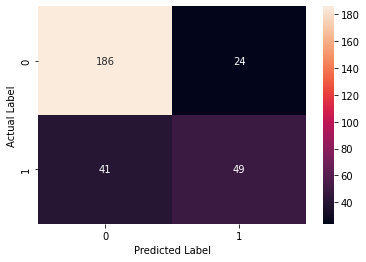

In [166]:
# 1: Inadimplente

sns.heatmap(pd.DataFrame(cmf), annot=True, fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [168]:
from sklearn.metrics import classification_report

In [169]:
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       210
           1       0.67      0.54      0.60        90

    accuracy                           0.78       300
   macro avg       0.75      0.72      0.73       300
weighted avg       0.77      0.78      0.78       300



### TODO

    1 - Rever as features (correlação)
    2 - Rever as classes
    3 - Testar utilizando pesos 
    4 - Utilizar um gridsearch (hiperparametros)